**Цель:** вспомнить задачу обучения
без учителя - кластеризацию, познакомиться с основным пайплайном
работы с кластеризацией.

Решаем задачу кластеризации с Kaggle, попутно
объясняя всё происходящее.

Проходим по пайплайну **Exploratory Data Analysis ->
Preprocessing -> Modelling -> Interpretation**

# Credit Card Clustering

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline

# 1. EDA

## 1.1 Знакомство с данными

In [2]:
data = pd.read_csv('CC GENERAL.csv')

In [3]:
data.shape

(8950, 18)

In [4]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
data['CUST_ID'].nunique()

8950

In [6]:
data.drop('CUST_ID', axis=1, inplace=True)

In [7]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [8]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [9]:
data.tail()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945   28.493517           1.000000     291.12              0.00   
8946   19.183215           1.000000     300.00              0.00   
8947   23.398673           0.833333     144.40              0.00   
8948   13.457564           0.833333       0.00              0.00   
8949  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

## 1.2 Пропуски

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [11]:
null_cols = data.isnull().any()
null_cols[null_cols == True]

CREDIT_LIMIT        True
MINIMUM_PAYMENTS    True
dtype: bool

#### CREDIT_LIMIT

In [12]:
data[data['CREDIT_LIMIT'].isnull()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

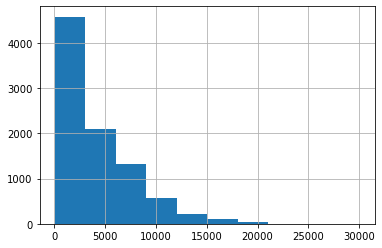

In [13]:
data['CREDIT_LIMIT'].hist();

In [14]:
data['CREDIT_LIMIT'].min()

50.0

In [15]:
data.dropna(subset=['CREDIT_LIMIT'], axis=0, inplace=True)

In [16]:
data[data['CREDIT_LIMIT'].isnull()]

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

#### MINIMUM_PAYMENTS

In [17]:
data[data['MINIMUM_PAYMENTS'].isnull()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     1666.670542           0.636364    1499.00           1499.00   
45    2242.311686           1.000000     437.00             97.00   
47    3910.111237           1.000000       0.00              0.00   
54       6.660517           0.636364     310.00              0.00   
55    1311.995984           1.000000    1283.90           1283.90   
...           ...                ...        ...               ...   
8919    14.524779           0.333333     152.00            152.00   
8929   371.527312           0.333333       0.00              0.00   
8935   183.817004           1.000000     465.90              0.00   
8944   193.571722           0.833333    1012.73           1012.73   
8946    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN               0.0       6  
8929    0.000000               NaN               0.0       6  
8935    0.000000   

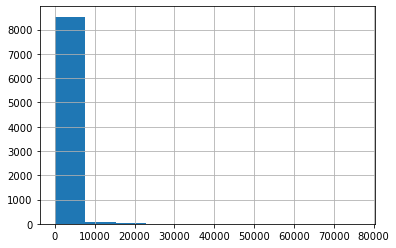

In [18]:
data['MINIMUM_PAYMENTS'].hist();

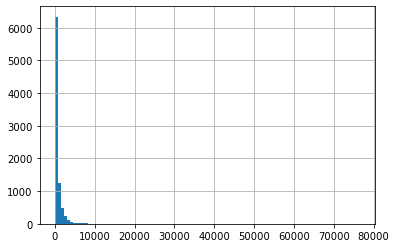

In [22]:
data['MINIMUM_PAYMENTS'].hist(bins=100);

In [19]:
data['MINIMUM_PAYMENTS'].min()

0.019163

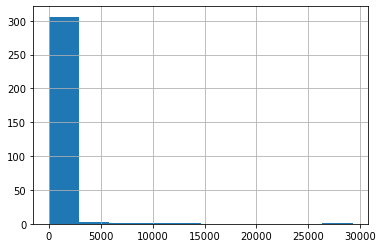

In [20]:
data[data['MINIMUM_PAYMENTS'].isnull()]['PAYMENTS'].hist();

In [23]:
data['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

In [24]:
null_cols = data.isnull().any()
null_cols[null_cols == True]

Series([], dtype: bool)

## 1.3 Статистики и распределения

In [25]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8949.000000        8949.000000   8949.000000       8949.000000   
mean    1564.647593           0.877350   1003.316936        592.503572   
std     2081.584016           0.236798   2136.727848       1659.968851   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.365782           0.888889     39.800000          0.000000   
50%      873.680279           1.000000    361.490000         38.000000   
75%     2054.372848           1.000000   1110.170000        577.830000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean               411.113579    978.959616             0.490405   
std                904.378205   2097.264344             0.401360   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.650000   1113.868654             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.202480                          0.364478   
std                      0.298345                          0.397451   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.135141          3.249078      14.711476   4494.449450   
std                  0.200132          6.824987      24.858552   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8949.000000       8949.000000       8949.000000  8949.000000  
mean    1733.336511        834.075035          0.153732    11.517935  
std     2895.168146       2336.104378          0.292511     1.337134  
min        0.000000          0.000000          0.000000     6.000000  
25%      383.282850        163.029483          0.000000    12.000000  
50%      857.062706        289.686899          0.000000    12.000000  
75%     1901.279320        788.721609          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [26]:
data.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8949.000000        8949.000000   8949.000000       8949.000000   
mean    1564.647593           0.877350   1003.316936        592.503572   
std     2081.584016           0.236798   2136.727848       1659.968851   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.365782           0.888889     39.800000          0.000000   
50%      873.680279           1.000000    361.490000         38.000000   
75%     2054.372848           1.000000   1110.170000        577.830000   
90%     4338.568457           1.000000   2542.638000       1600.198000   
99%     9338.873258           1.000000   8977.910000       6690.126400   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean               411.113579    978.959616             0.490405   
std                904.378205   2097.264344             0.401360   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.650000   1113.868654             0.916667   
90%               1140.140000   3066.599055             1.000000   
99%               3886.256000   9588.329752             1.000000   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.202480                          0.364478   
std                      0.298345                          0.397451   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
90%                      0.750000                          1.000000   
99%                      1.000000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.135141          3.249078      14.711476   4494.449450   
std                  0.200132          6.824987      24.858552   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
90%                  0.416667         10.000000      37.000000   9500.000000   
99%                  0.833333         29.000000     116.520000  17000.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8949.000000       8949.000000       8949.000000  8949.000000  
mean    1733.336511        834.075035          0.153732    11.517935  
std     2895.168146       2336.104378          0.292511     1.337134  
min        0.000000          0.000000          0.000000     6.000000  
25%      383.282850        163.029483          0.000000    12.000000  
50%      857.062706        289.686899          0.000000    12.000000  
75%     1901.279320        788.721609          0.142857    12.000000  
90%     3924.252866       1731.830569          0.673334    12.000000  
99%    13609.614291       8627.047593          1.000000    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

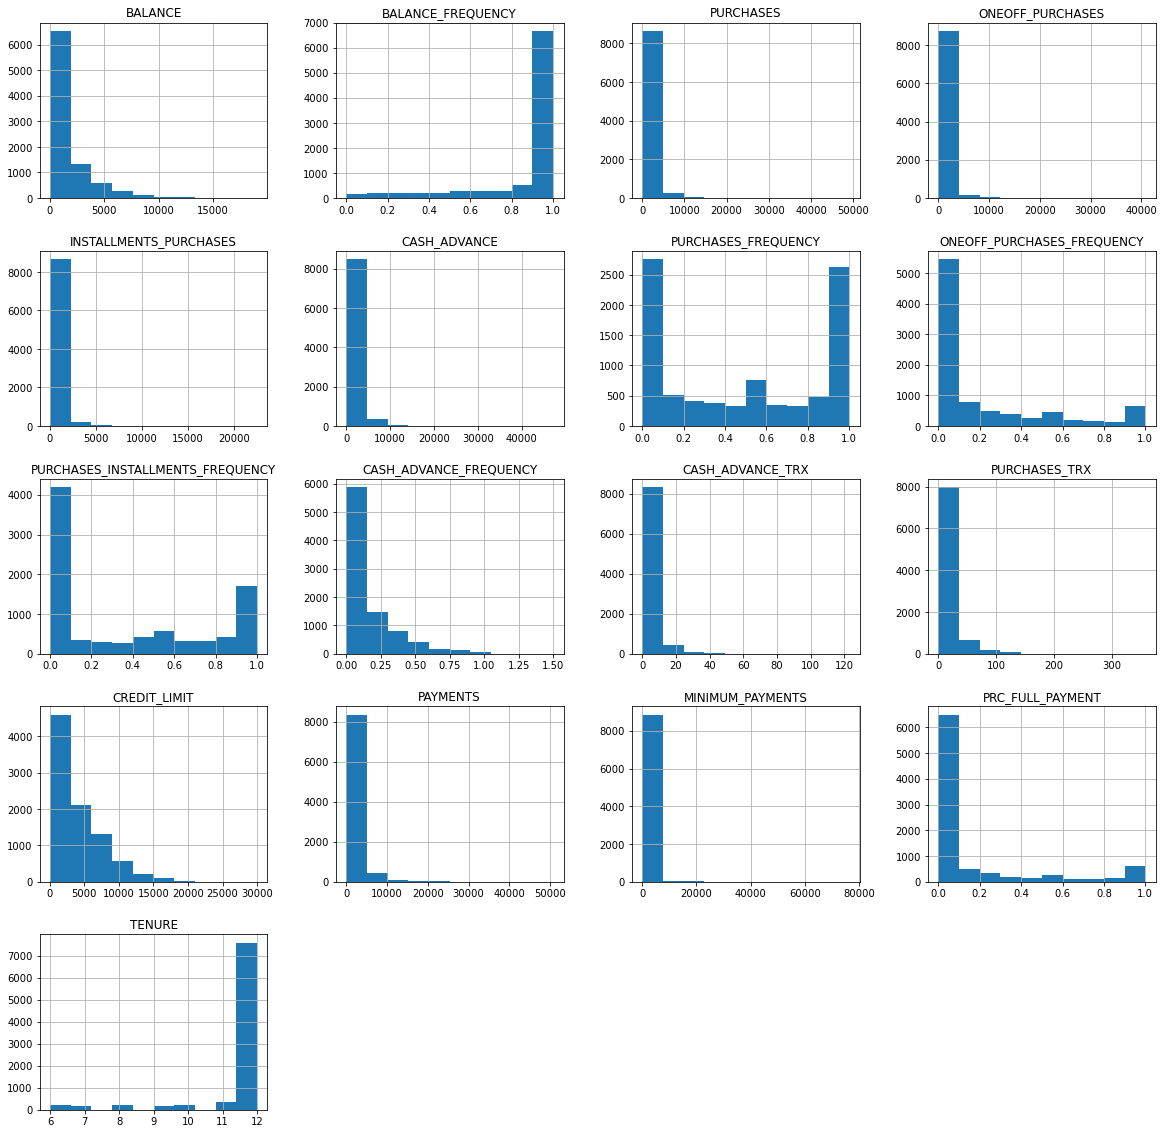

In [27]:
data.hist(figsize=(20,20));

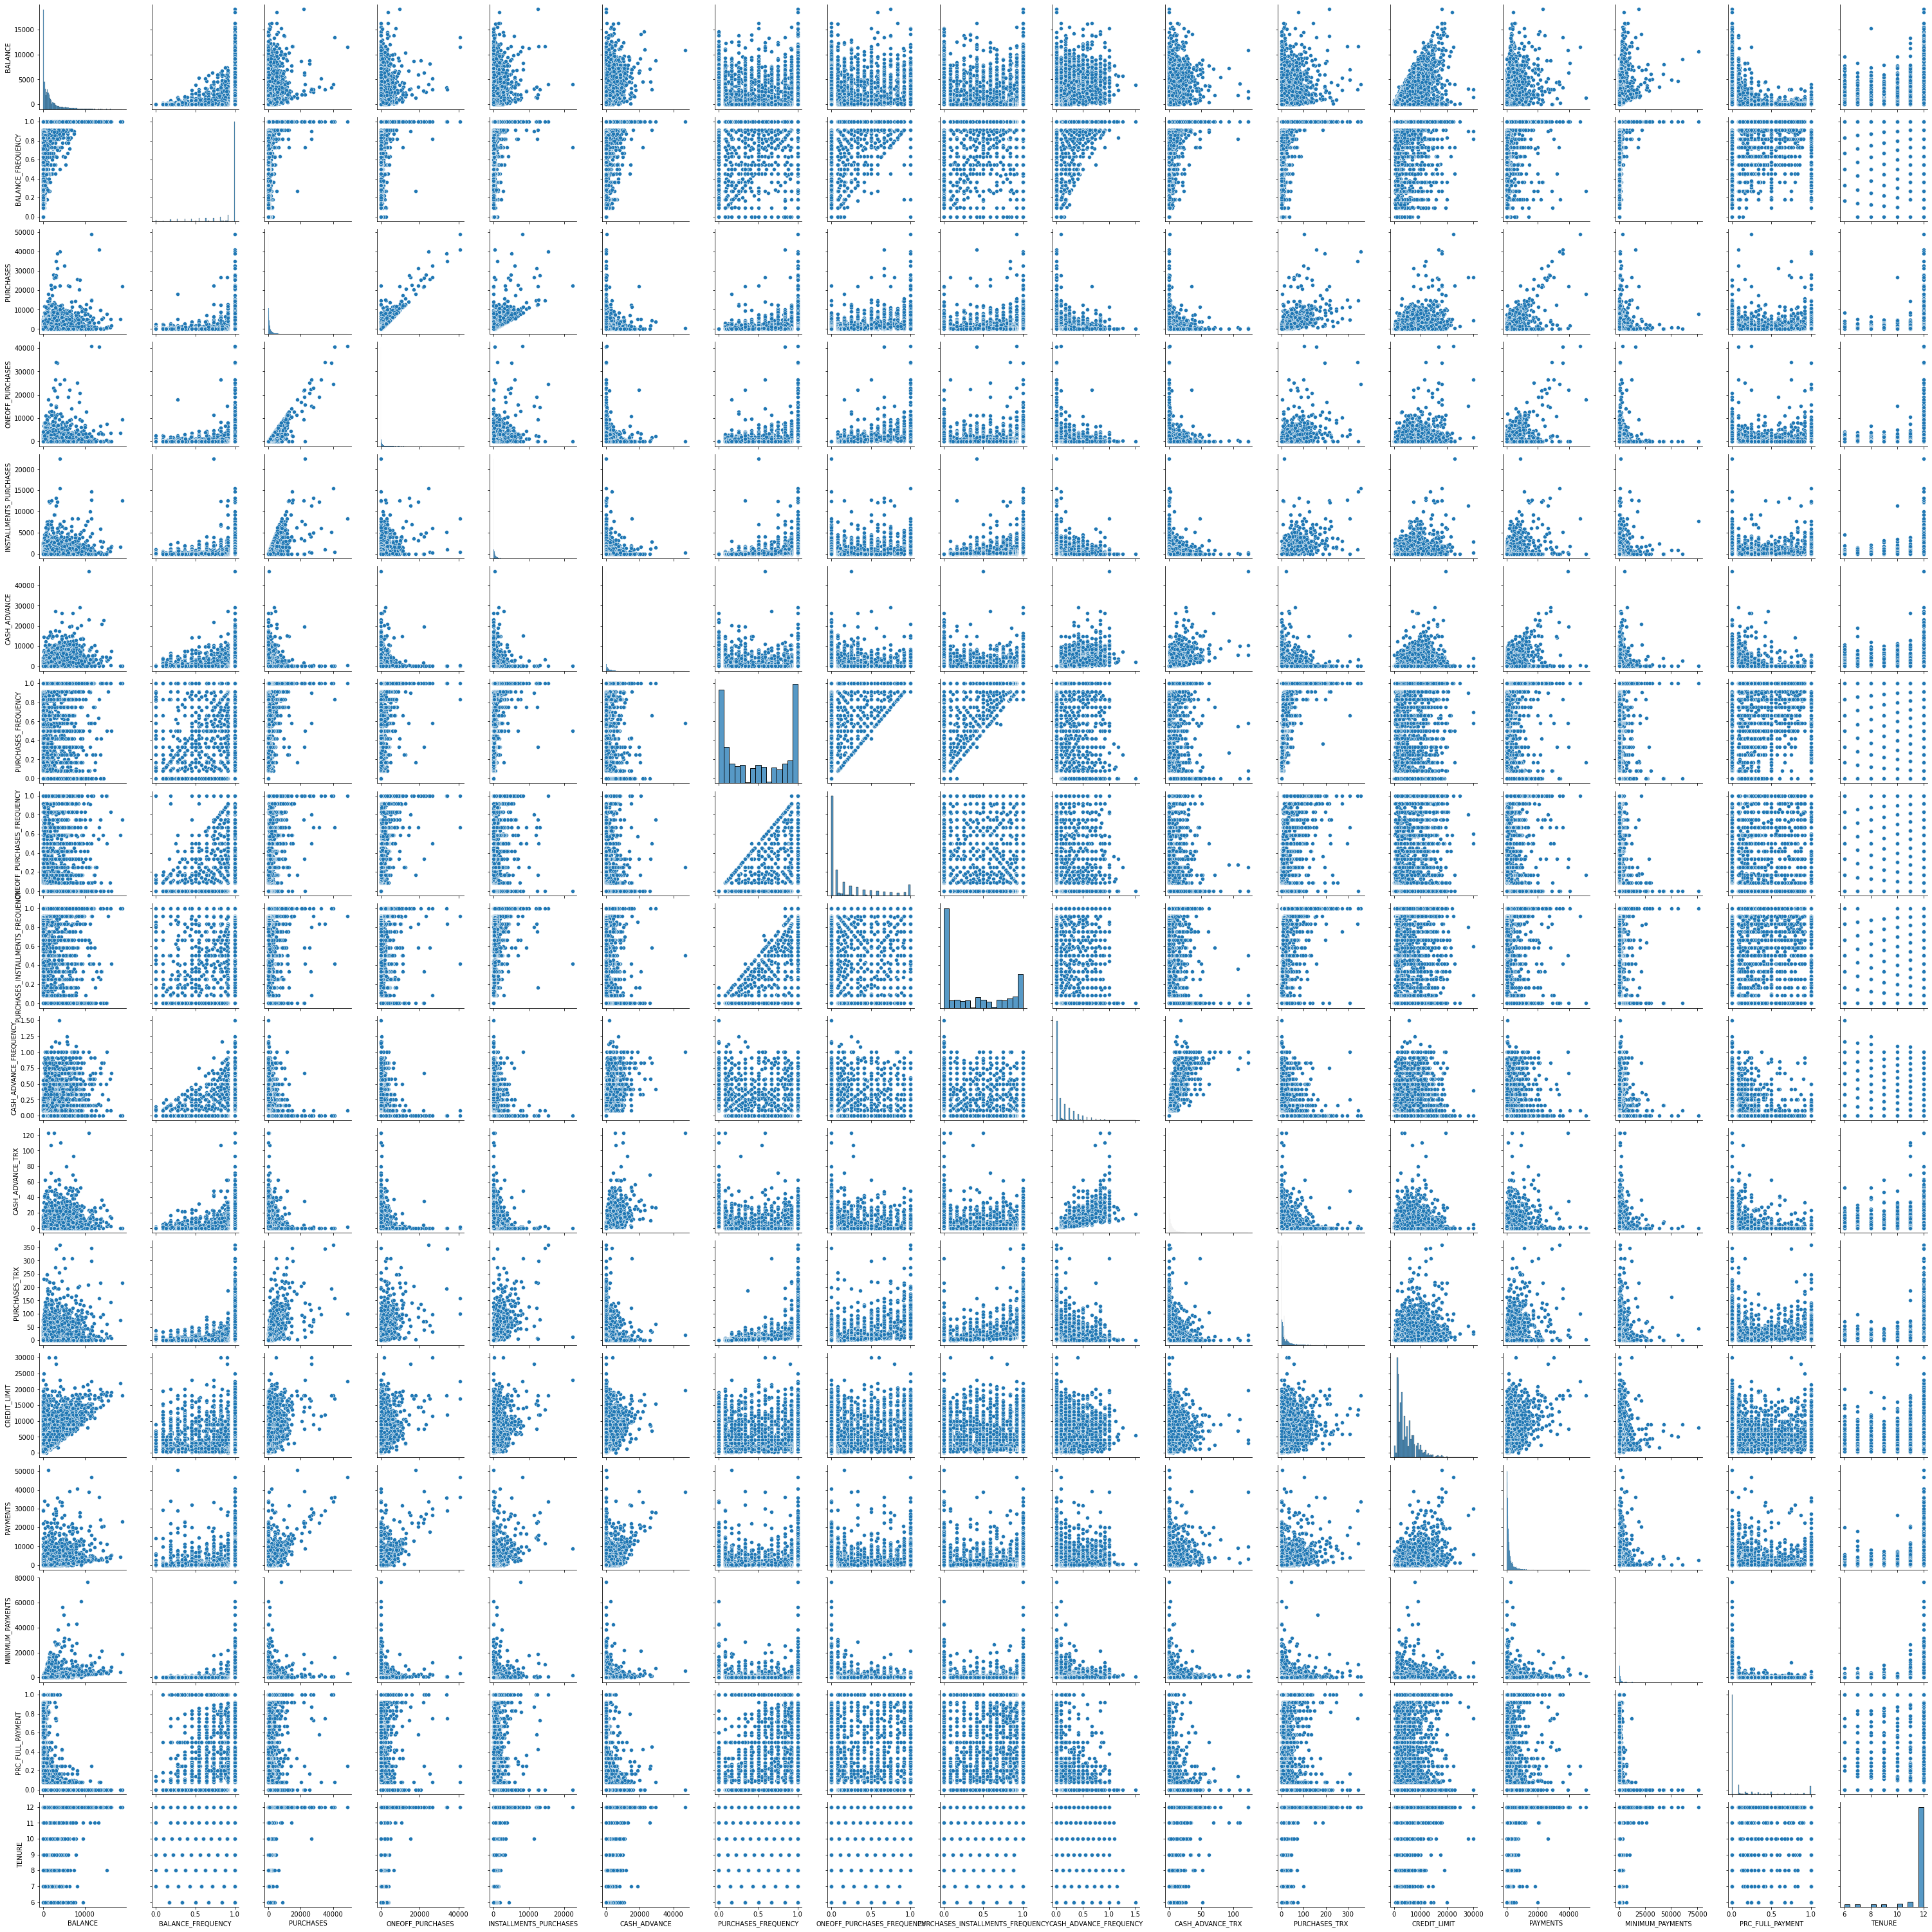

In [28]:
sns.pairplot(data);

## 1.4 Корреляция

In [29]:
corr = data.corr()

In [30]:
mask = np.triu(np.ones_like(corr, dtype=bool))

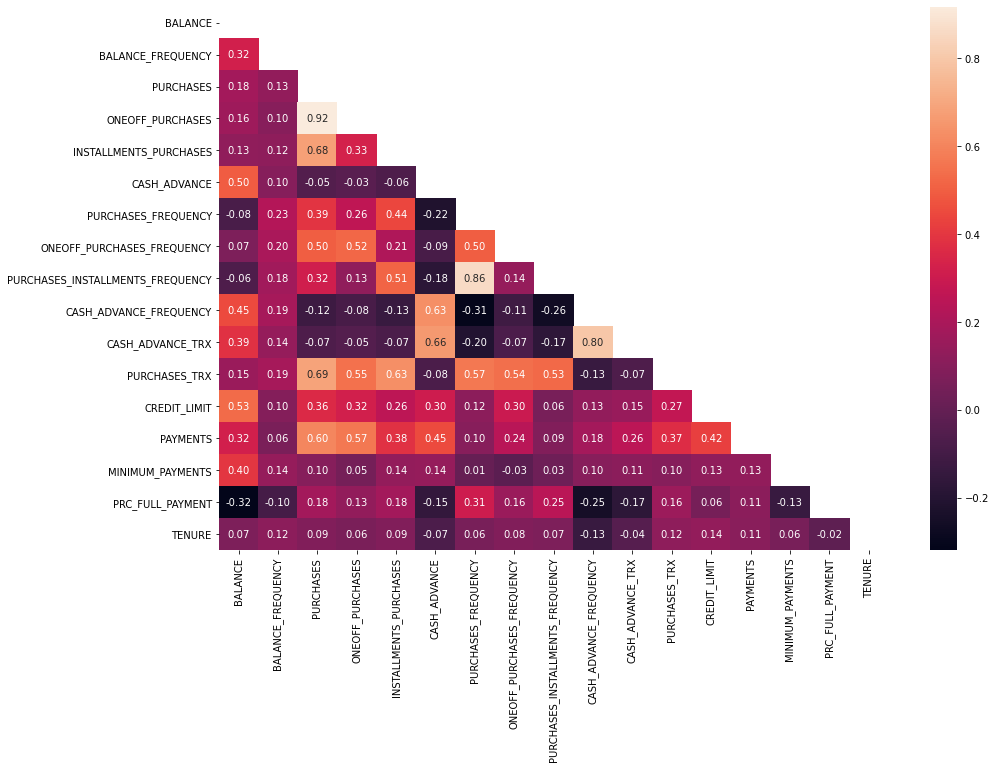

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

In [32]:
# Находим пары признаков с корреляцией больше 0.7
CorField = []
corr_cols = []
for i in corr:
    for j in corr.index[corr[i] > 0.7]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i, j, corr[i][corr.index == j].values[0])
            corr_cols.append(i)
            corr_cols.append(j)

PURCHASES ONEOFF_PURCHASES 0.9168436510438295
PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY 0.8629209546628908
CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX 0.7995725179400439


In [33]:
corr_cols

['PURCHASES',
 'ONEOFF_PURCHASES',
 'PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX']

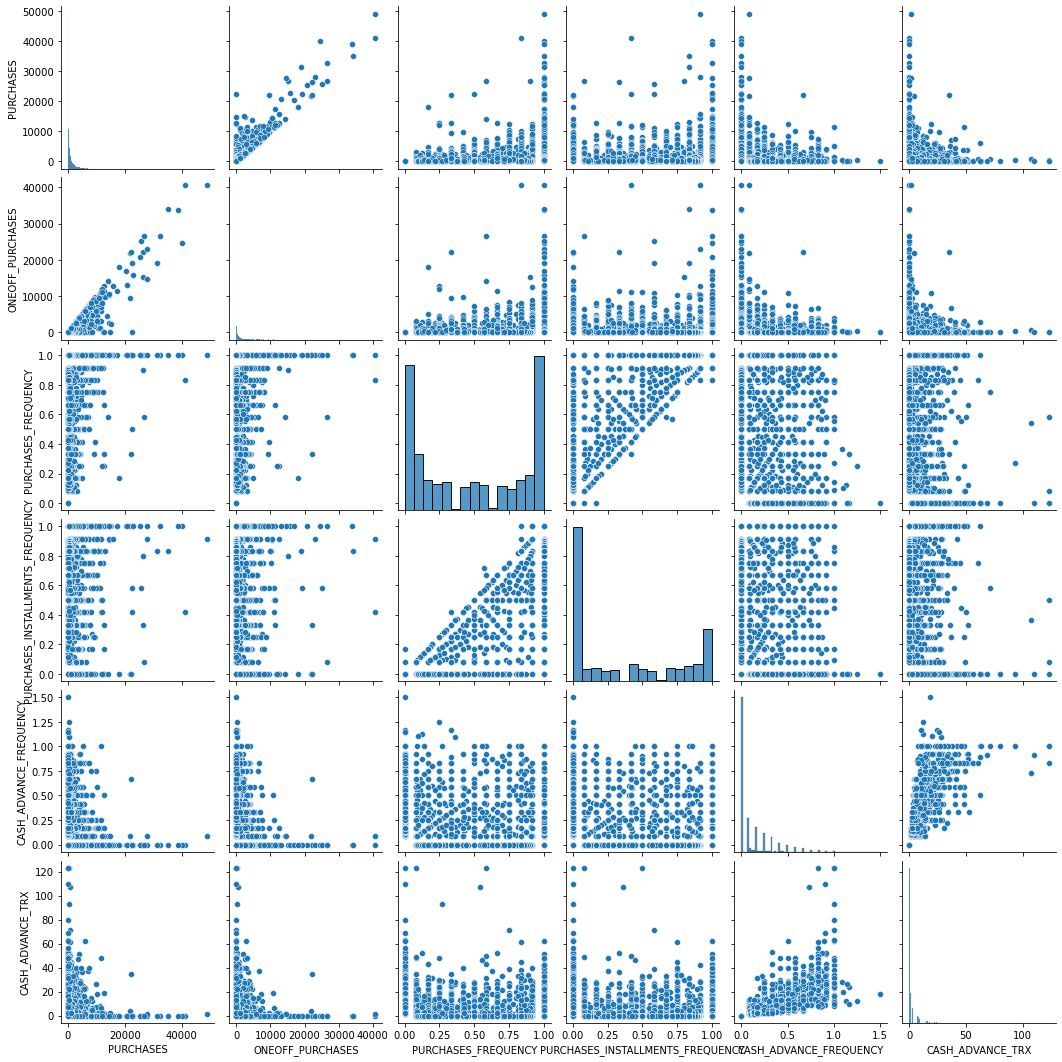

In [34]:
sns.pairplot(data[corr_cols]);

# 2. Нормализация

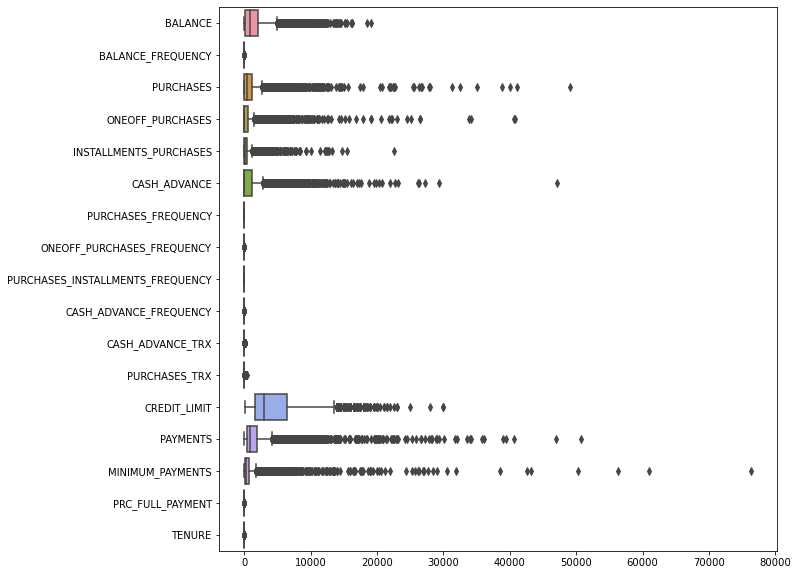

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient='h');

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_scaled = scaler.fit_transform(data)

In [39]:
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)

In [40]:
data_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.031720   
1                0.166667           0.03252       0.000000      0.232053   
2                0.000000           0.00000       0.033520      0.248748   
3                0.055555           0.00813       0.002793      0.248748   
4                0.000000           0.00000       0.002793      0.038397   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.003979          0.001826          0.000000     1.0  
1  0.080893          0.014035          0.222222     1.0  
2  0.012264          0.008210          0.000000     1.0  
3  0.000000          0.000000          0.000000     1.0  
4  0.013374          0.003204          0.000000     1.0

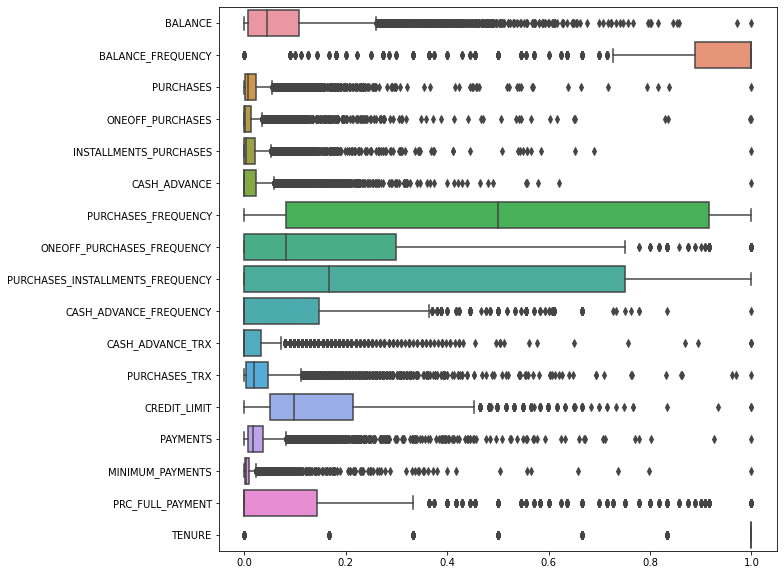

In [41]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_scaled, orient='h');

# 3. Снижение размерности для визуализации

## 3.1 PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2, random_state=10)

In [45]:
X_pca = pca.fit_transform(X_scaled)

In [46]:
X_pca.shape

(8949, 2)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


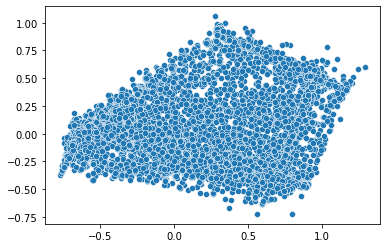

In [47]:
sns.scatterplot(X_pca[:,0], X_pca[:,1]);

## 3.2 TSNE

In [48]:
from sklearn.manifold import TSNE

In [49]:
tsne = TSNE(n_components=2, random_state=10)

In [50]:
X_tsne = tsne.fit_transform(X_scaled)

In [51]:
X_tsne.shape

(8949, 2)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


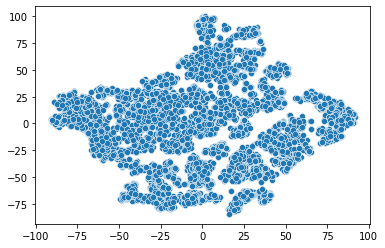

In [52]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1]);

# 4. Кластеризация

## 4.1 KMeans

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [53]:
from sklearn.cluster import KMeans
from tqdm import tqdm

In [54]:
kmeans = KMeans(n_clusters=3, random_state=10)

In [55]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=10)

In [56]:
labels = kmeans.labels_

In [57]:
labels

array([0, 0, 1, ..., 2, 0, 1])

In [58]:
np.unique(labels)

array([0, 1, 2])

In [104]:
inertia = []
for i in tqdm(range(1,11)):
    kmeans = KMeans(n_clusters=i, random_state=10).fit(X_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.76it/s]


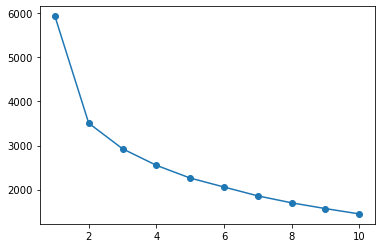

In [60]:
plt.plot(range(1,11), inertia, marker='o');

In [62]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

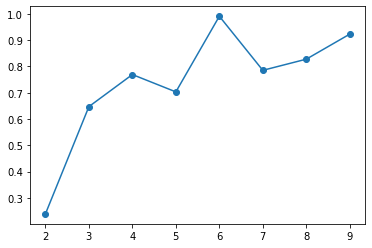

In [63]:
plt.plot(range(2,10), D, marker='o')

### силуэт

In [64]:
from sklearn.metrics import silhouette_score

In [103]:
silhouette = []
for i in tqdm(range(2,11)):
    kmeans = KMeans(n_clusters=i, random_state=10).fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:22<00:00,  2.52s/it]


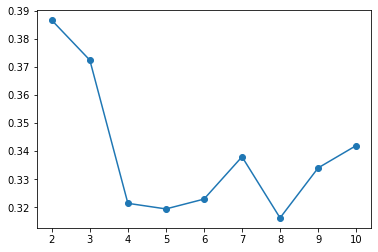

In [66]:
plt.plot(range(2,11), silhouette, marker='o')

In [67]:
kmeans = KMeans(n_clusters=2, random_state=10).fit(X_scaled)

In [68]:
labels = kmeans.labels_

In [69]:
data['labels'] = labels

In [70]:
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  labels  
0   201.802084        139.509787          0.000000      12       1  
1  4103.032597       1072.340217          0.222222      12       1  
2   622.066742        627.284787          0.000000      12       0  
3     0.000000          0.000000          0.000000      12       1  
4   678.334763        244.791237          0.000000      12       1

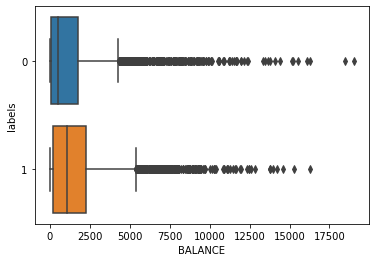

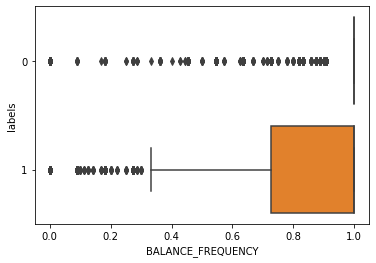

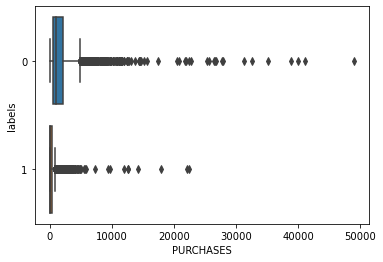

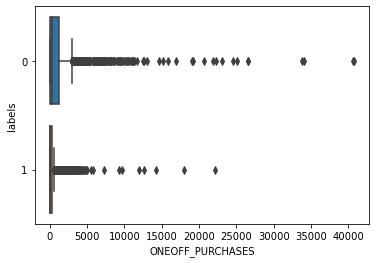

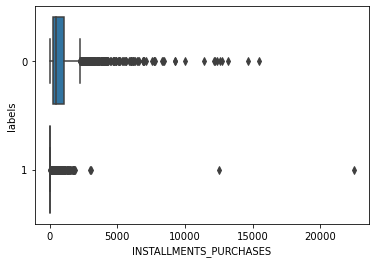

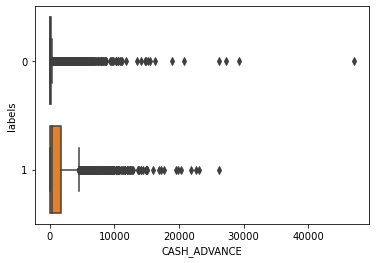

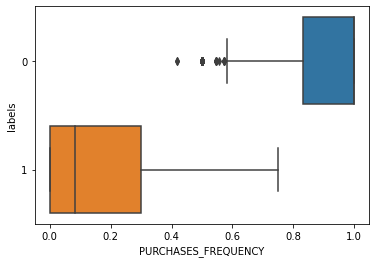

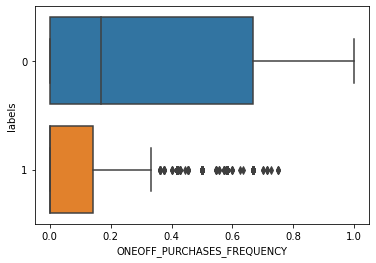

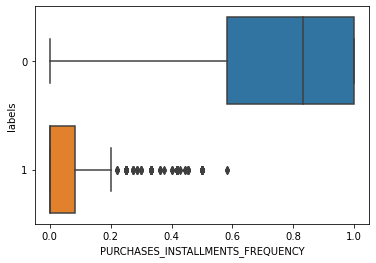

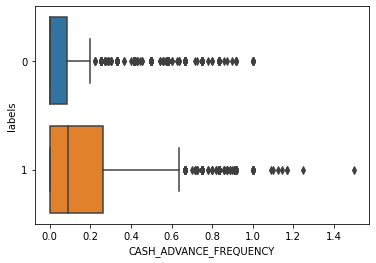

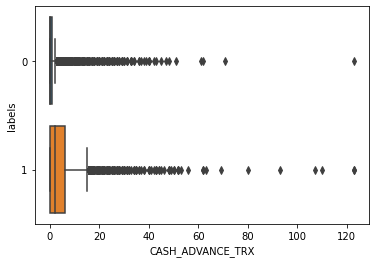

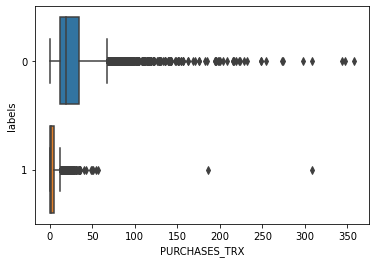

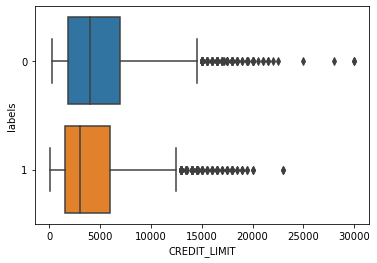

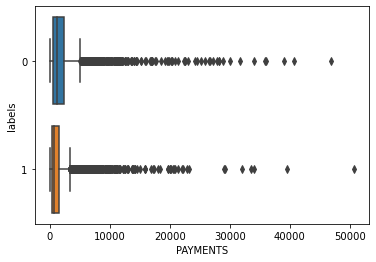

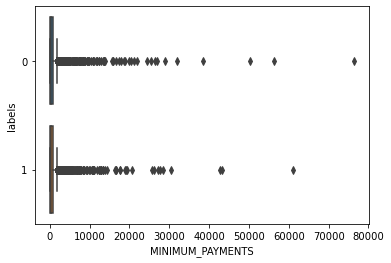

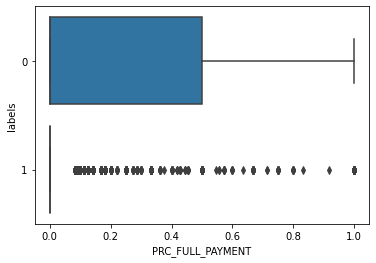

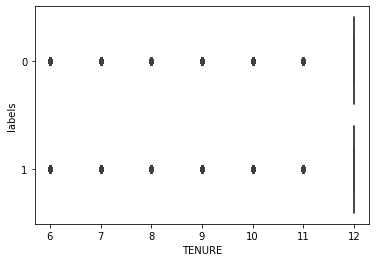

In [71]:
for col in data.columns[:-1]:
    sns.boxplot(data=data, x=col, y='labels', orient='h')
    plt.show();

In [72]:
feature_median = data.groupby('labels').median().T

In [73]:
feature_median

labels                                      0            1
BALANCE                            539.546531  1073.424810
BALANCE_FREQUENCY                    1.000000     1.000000
PURCHASES                         1004.640000    64.710000
ONEOFF_PURCHASES                   248.440000     0.000000
INSTALLMENTS_PURCHASES             493.075000     0.000000
CASH_ADVANCE                         0.000000   348.834361
PURCHASES_FREQUENCY                  1.000000     0.083333
ONEOFF_PURCHASES_FREQUENCY           0.166667     0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.833333     0.000000
CASH_ADVANCE_FREQUENCY               0.000000     0.090909
CASH_ADVANCE_TRX                     0.000000     2.000000
PURCHASES_TRX                       18.500000     1.000000
CREDIT_LIMIT                      4000.000000  3000.000000
PAYMENTS                          1130.494217   680.023540
MINIMUM_PAYMENTS                   216.545111   352.000230
PRC_FULL_PAYMENT                     0.000000     0.000000
TENURE                              12.000000    12.000000

In [74]:
display(feature_median.style.background_gradient(cmap='Blues', axis=1))

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


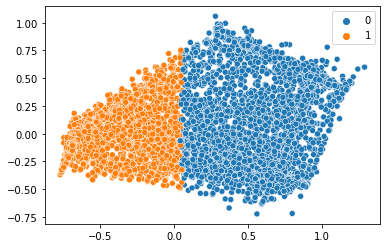

In [75]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=labels);

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


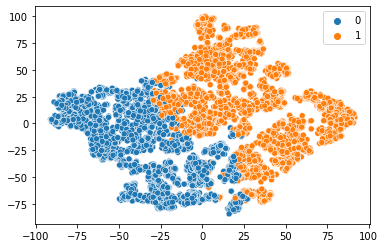

In [76]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels);

In [77]:
kmeans = KMeans(n_clusters=3, random_state=10).fit(X_scaled)

In [78]:
labels = kmeans.labels_

In [79]:
data['labels'] = labels

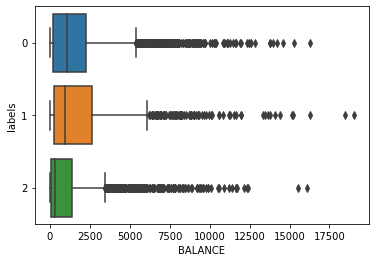

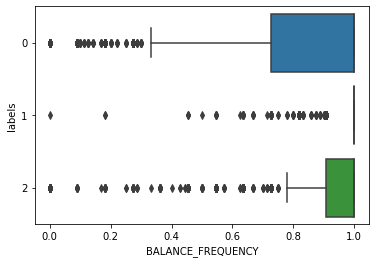

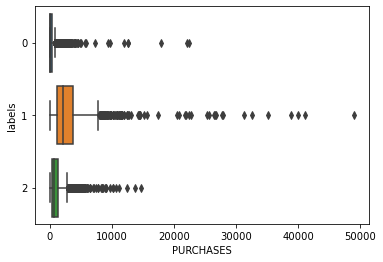

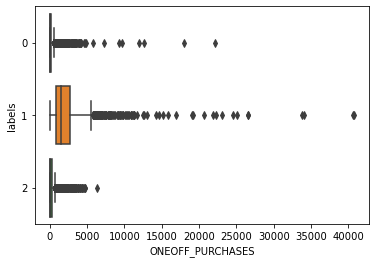

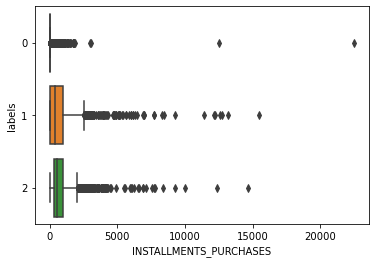

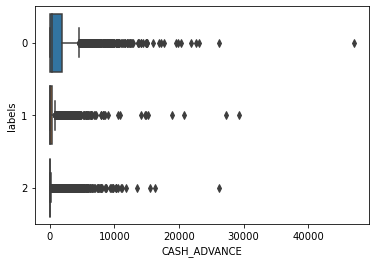

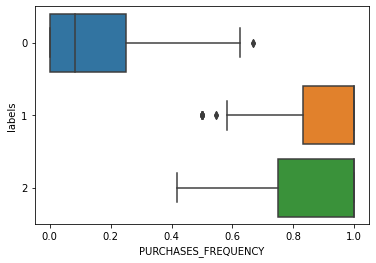

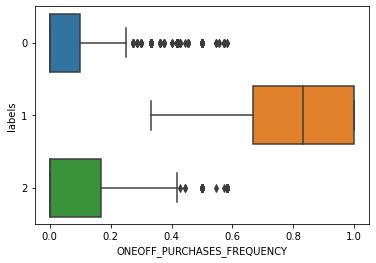

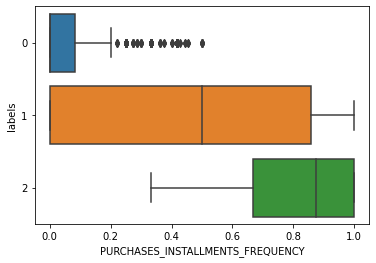

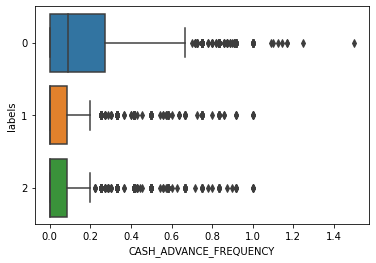

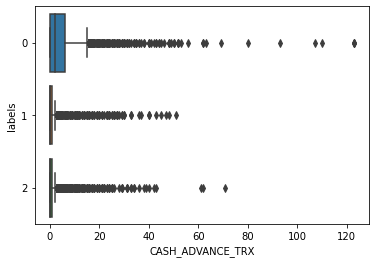

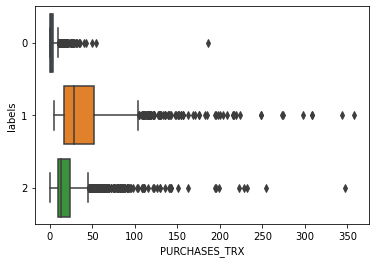

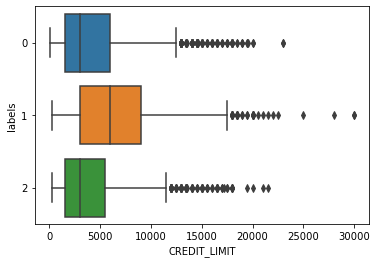

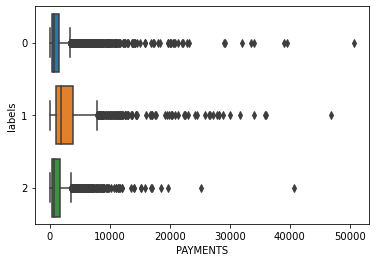

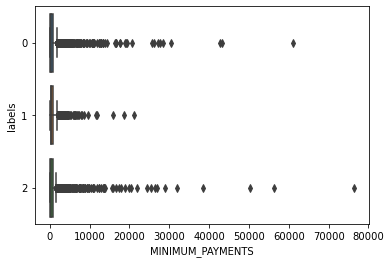

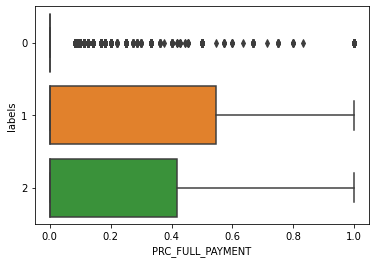

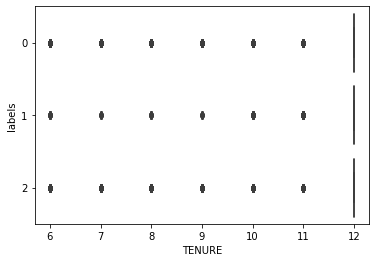

In [80]:
for col in data.columns[:-1]:
    sns.boxplot(data=data, x=col, y='labels', orient='h')
    plt.show();

In [81]:
feature_median = data.groupby('labels').median().T

In [82]:
data['labels'].value_counts(normalize=True)

0    0.527992
2    0.310761
1    0.161247
Name: labels, dtype: float64

In [83]:
display(feature_median.style.background_gradient(cmap='Blues', axis=1))

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


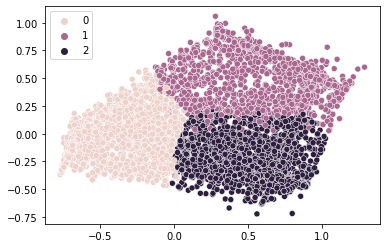

In [84]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=labels);

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


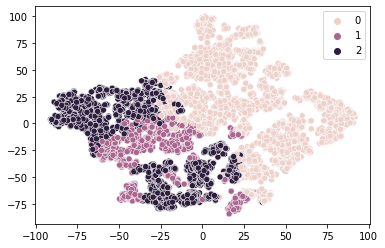

In [85]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels);

In [86]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.38671169317775794
For n_clusters = 3 The average silhouette_score is : 0.3724925938813161
For n_clusters = 4 The average silhouette_score is : 0.3214646360845477
For n_clusters = 5 The average silhouette_score is : 0.31946608010623145
For n_clusters = 6 The average silhouette_score is : 0.32296551499947906
For n_clusters = 7 The average silhouette_score is : 0.33805237086055806
For n_clusters = 8 The average silhouette_score is : 0.3162617504179206
For n_clusters = 9 The average silhouette_score is : 0.3340762179027034
For n_clusters = 10 The average silhouette_score is : 0.3420376581909135


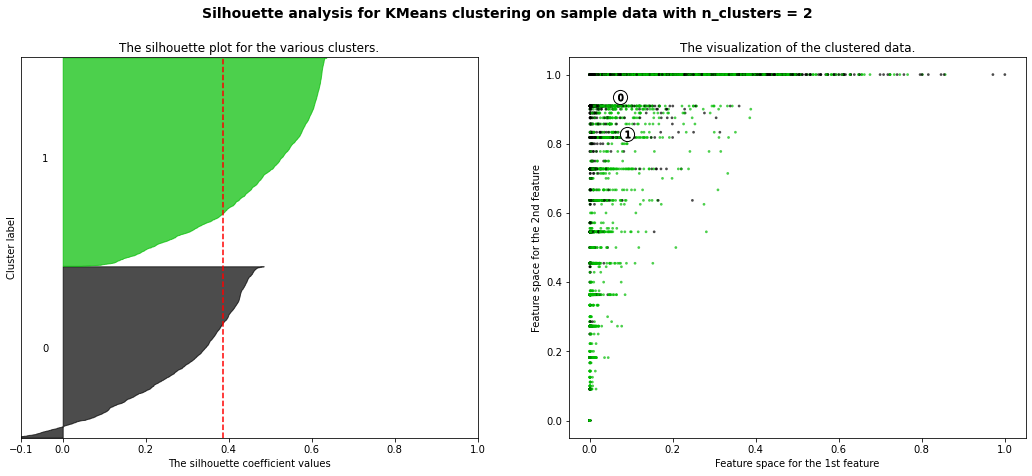

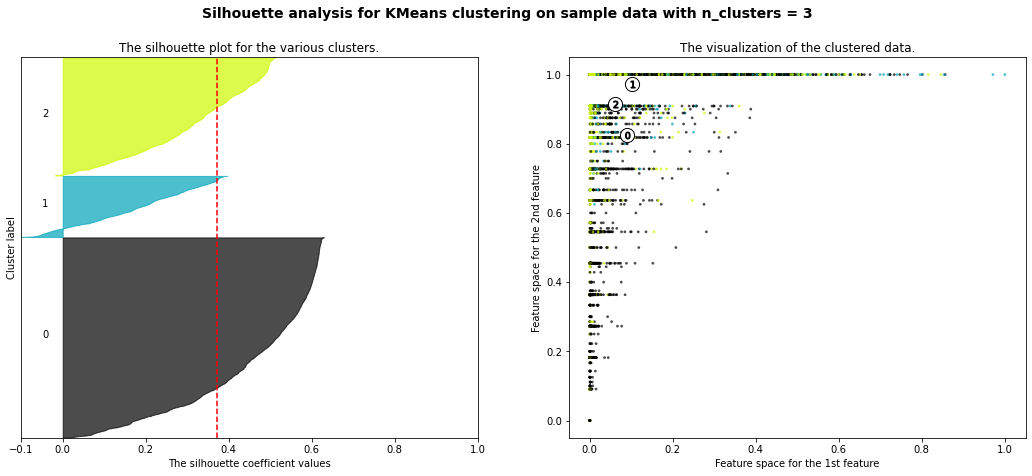

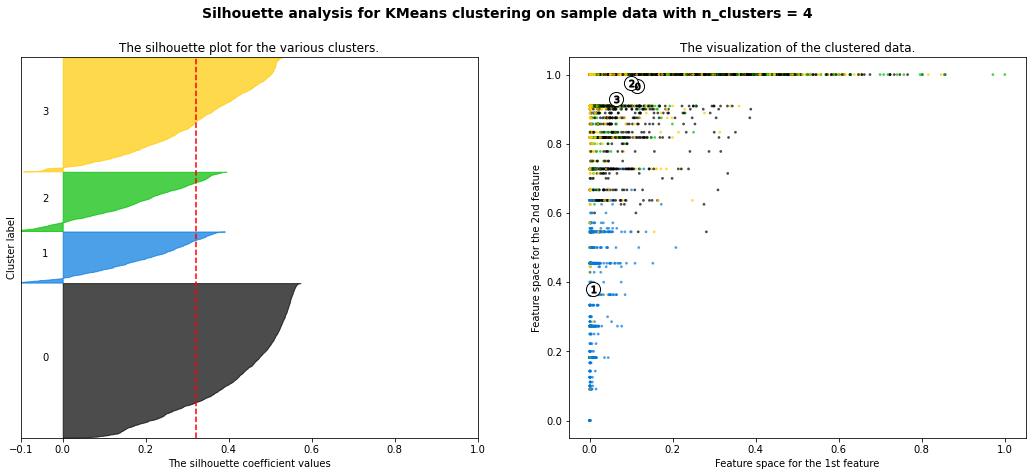

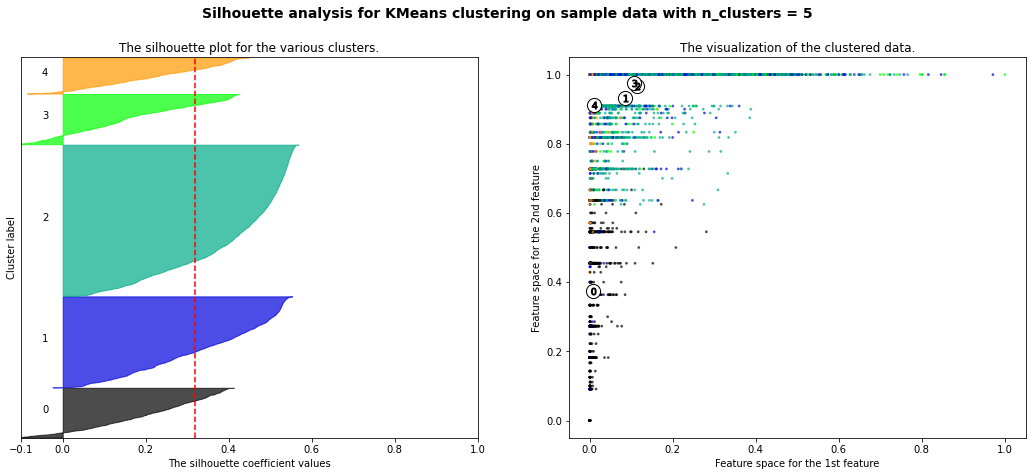

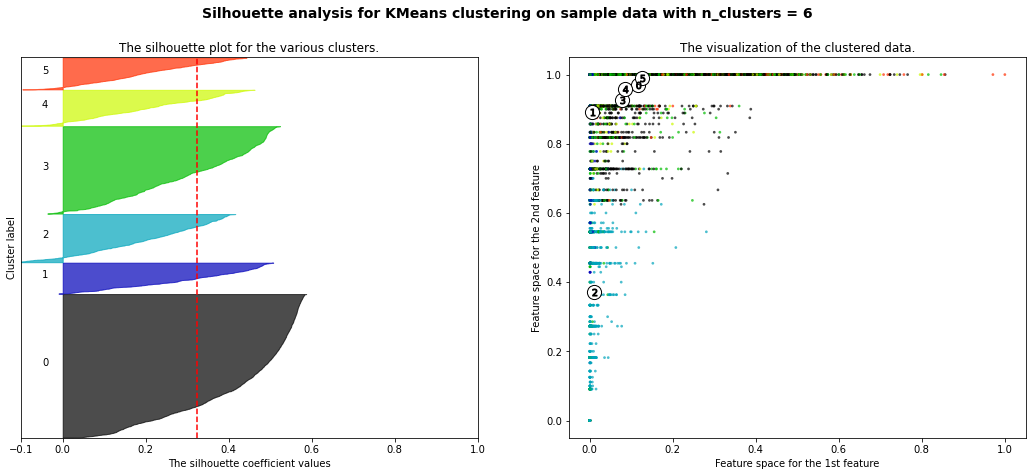

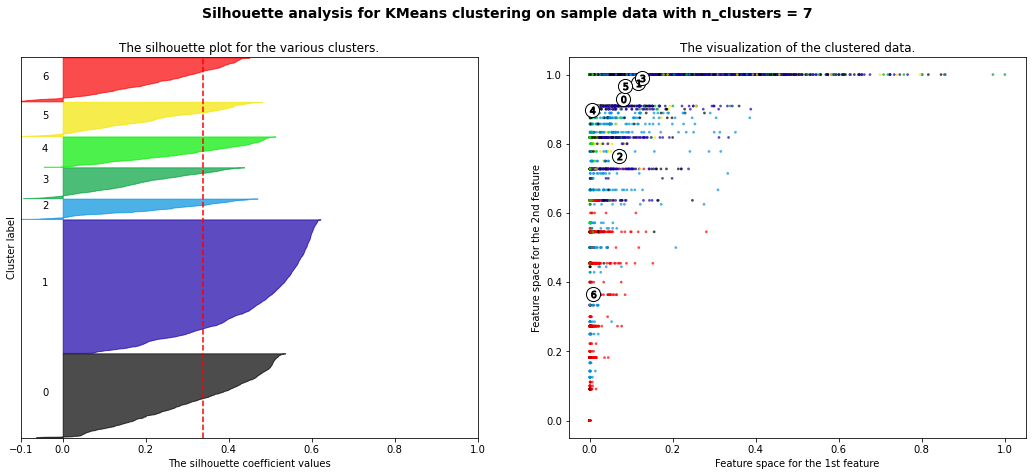

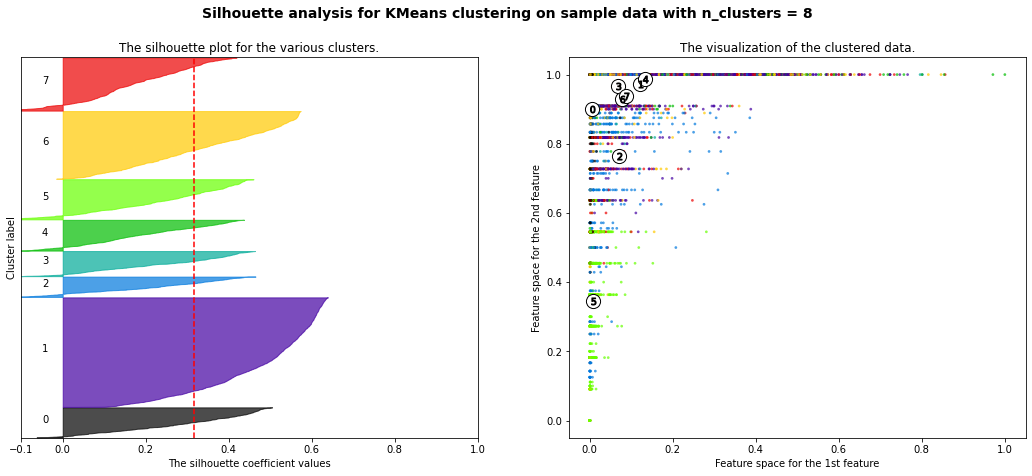

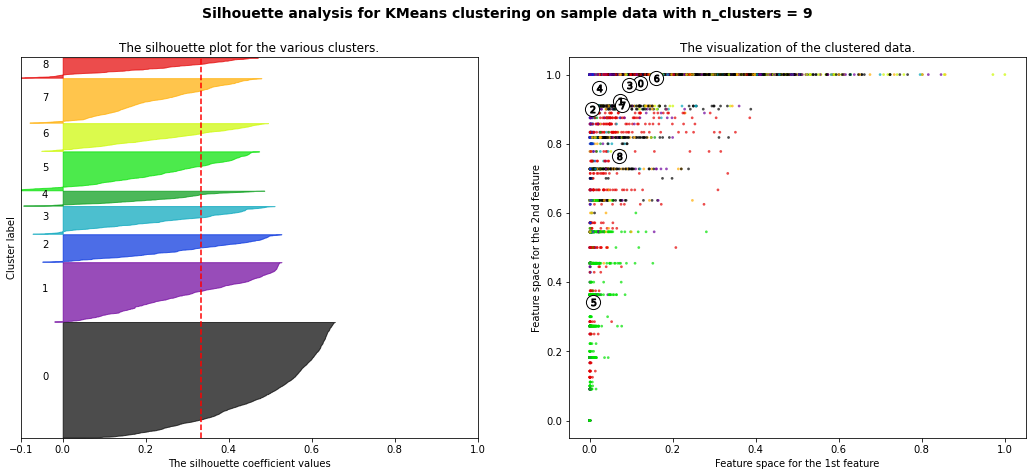

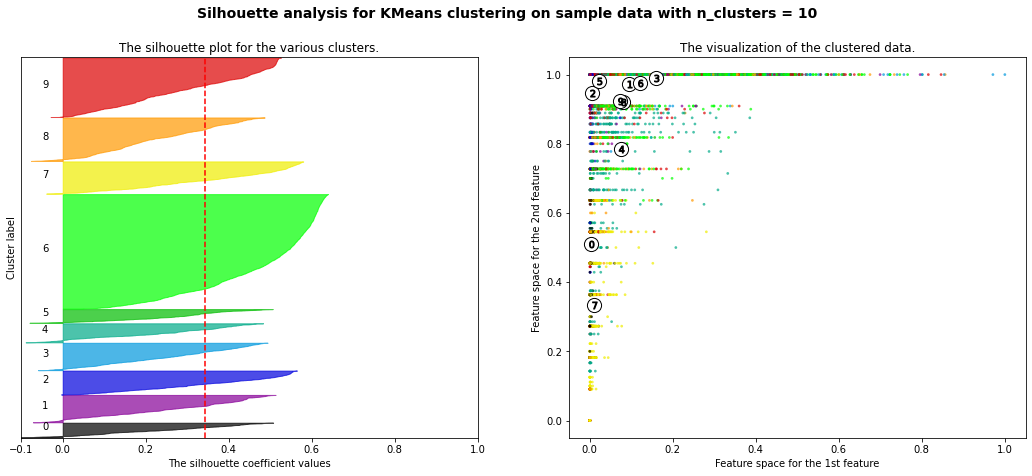

In [87]:
range_n_clusters = list(range(2,11))
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## 4.2 Иерархическая кластеризация

In [88]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

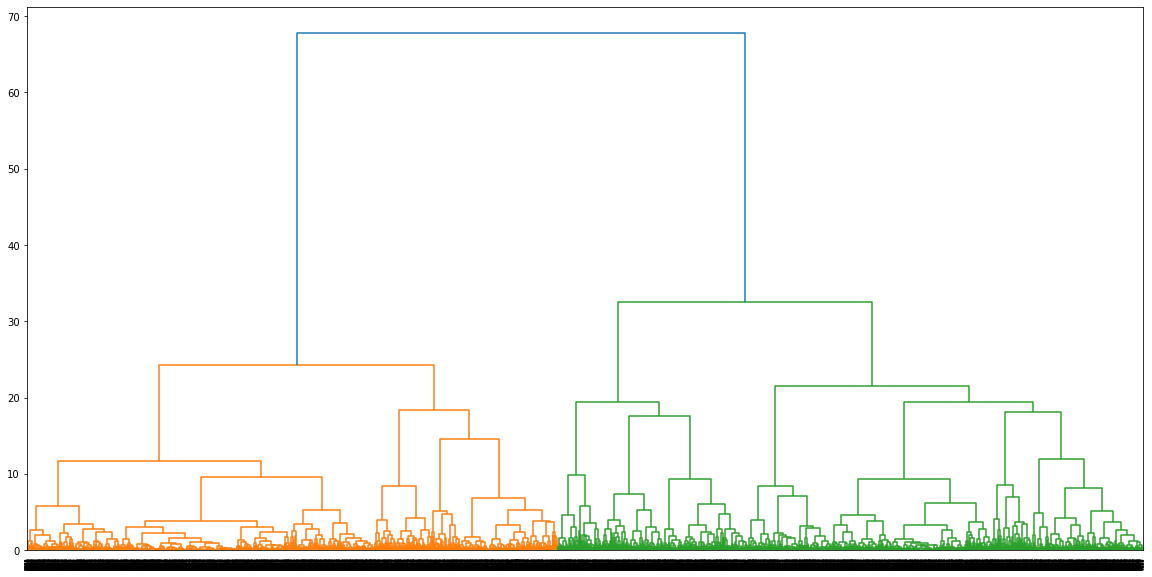

In [89]:
plt.figure(figsize=(20,10))
dendrogram_ = dendrogram(linkage(X_scaled, method='ward'))

### силуэт

In [90]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:13<00:00,  8.20s/it]


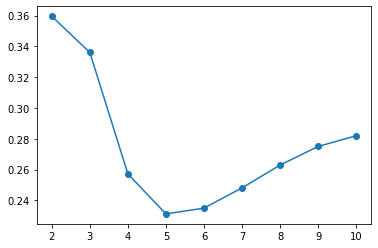

In [91]:
plt.plot(range(2,11), silhouette, marker='o')

выберем 3 кластера

In [92]:
agg = AgglomerativeClustering(n_clusters=3).fit(X_scaled)

In [93]:
labels = agg.labels_

In [94]:
data['labels'] = labels

In [95]:
feature_median = data.groupby('labels').median().T

In [96]:
data['labels'].value_counts(normalize=True)

0    0.475919
1    0.353336
2    0.170745
Name: labels, dtype: float64

In [97]:
feature_median = data.groupby('labels').median().T

In [98]:
display(feature_median.style.background_gradient(cmap='Blues', axis=1))

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


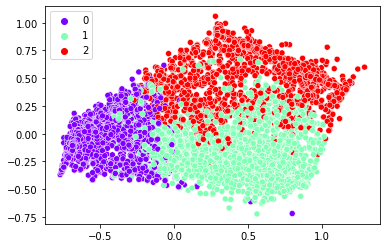

In [99]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=labels, palette='rainbow');

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


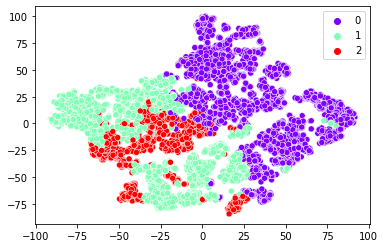

In [100]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

## 4.3 DBSCAN

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [23]:
dbscan = DBSCAN(n_jobs=-1)

In [24]:
dbscan.fit(X_scaled)

DBSCAN(n_jobs=-1)

In [25]:
labels = dbscan.labels_

In [26]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
np.unique(labels)

array([-1,  0], dtype=int64)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


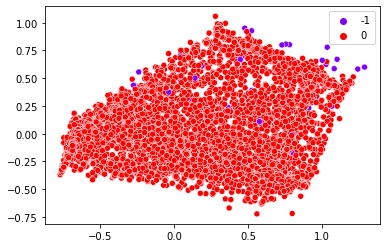

In [28]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=labels, palette='rainbow');

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


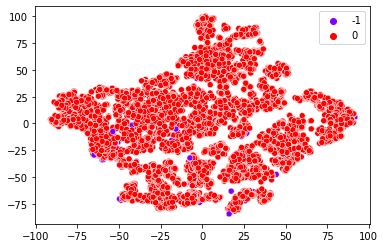

In [29]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

In [30]:
neighbors = NearestNeighbors(n_neighbors=5)
nbrs = neighbors.fit(X_scaled)

In [31]:
distance, indices = nbrs.kneighbors(X_scaled)

In [32]:
distance

array([[0.        , 0.09032434, 0.11413179, 0.12446887, 0.12812273],
       [0.        , 0.16424182, 0.17368021, 0.17579155, 0.17673488],
       [0.        , 0.05582097, 0.0666049 , 0.070203  , 0.0838904 ],
       ...,
       [0.        , 0.20292398, 0.23231863, 0.26918671, 0.27403653],
       [0.        , 0.18125147, 0.19794558, 0.26054064, 0.26578615],
       [0.        , 0.22807208, 0.29345284, 0.31202806, 0.3144448 ]])

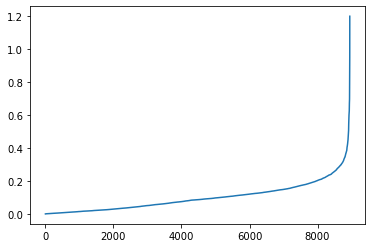

In [33]:
distance = np.sort(distance, axis=0)
distance = distance[:,1]
plt.plot(distance)

In [34]:
dbscan = DBSCAN(n_jobs=-1, eps=0.2, min_samples=5)

In [35]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.2, n_jobs=-1)

In [36]:
labels = dbscan.labels_

In [37]:
labels

array([ 0,  0,  0, ..., -1,  0, -1], dtype=int64)

In [38]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [39]:
data['labels'] = labels

In [40]:
data['labels'].value_counts()

 0     7561
-1     1341
 1        7
 7        5
 6        5
 5        5
 4        5
 10       5
 2        5
 9        4
 3        3
 8        3
Name: labels, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


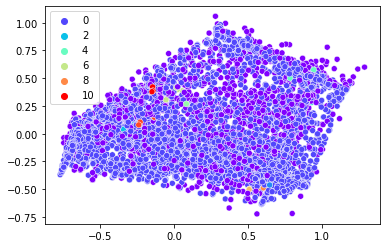

In [41]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=labels, palette='rainbow');

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


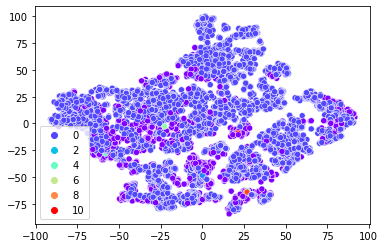

In [42]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

In [45]:
silhouette = []
clusters = []
eps_range = np.arange(0.2,0.7,0.05)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i).fit(X_scaled)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(X_scaled, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.33s/it]


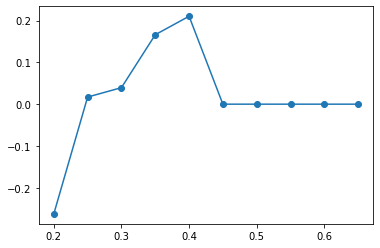

In [46]:
plt.plot(eps_range, silhouette, marker='o');

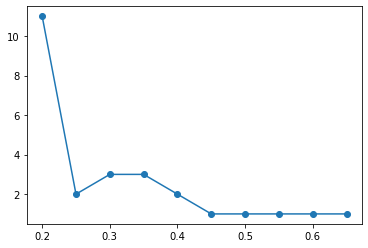

In [47]:
plt.plot(eps_range, clusters, marker='o');

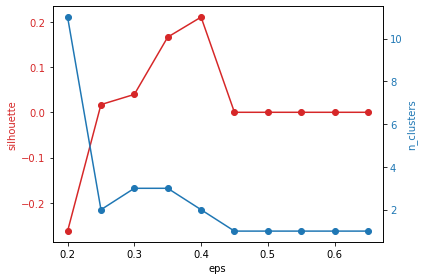

In [48]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(eps_range, silhouette, marker='o', color=color)
ax1.set_xlabel('eps')
ax1.set_ylabel('silhouette', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(eps_range, clusters, marker='o', color=color)
ax2.set_ylabel('n_clusters', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [49]:
dbscan = DBSCAN(n_jobs=-1, eps=0.4)

In [50]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.4, n_jobs=-1)

In [51]:
labels = dbscan.labels_

In [52]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [54]:
data['labels'] = labels

In [55]:
data['labels'].value_counts()

 0    8827
-1     116
 1       6
Name: labels, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


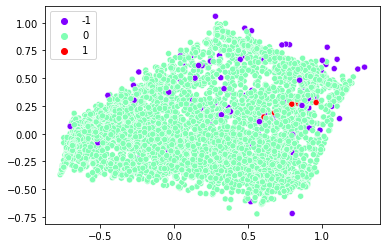

In [56]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=labels, palette='rainbow');

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


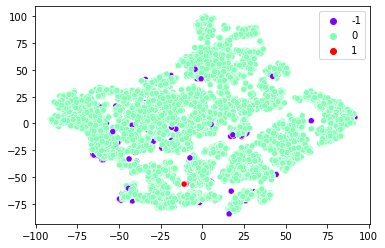

In [57]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');

In [58]:
dbscan = DBSCAN(n_jobs=-1, eps=0.35)

In [59]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.35, n_jobs=-1)

In [60]:
labels = dbscan.labels_

In [61]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

In [63]:
data['labels'] = labels

In [64]:
data['labels'].value_counts()

 0    8758
-1     180
 2       6
 1       5
Name: labels, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


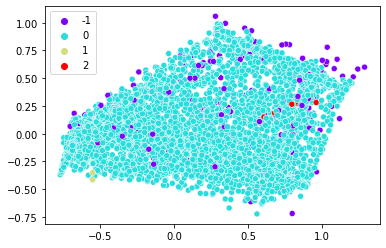

In [65]:
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=labels, palette='rainbow');

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


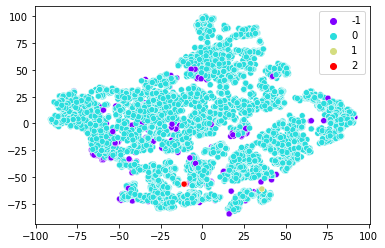

In [66]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=labels, palette='rainbow');